In [1]:
import pandas as pd
import math as m
import numpy as np
import pylab as py
import random as rd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns 
import array
from __future__ import division

In [2]:
accion_A = pd.read_csv("accion A.csv")
accion_B = pd.read_csv("accion B.csv")

In [3]:
accion_A = accion_A.rename_axis('ID').values

In [4]:
accion_B = accion_B.rename_axis('ID').values

# a) Definir estados del sistema

En cada día, podría pasar que el valor de la acción A sea mayor, igual o menor que el valor de la acción B, por lo que los estados que se definen son: 'A mayor que B', 'B mayor que A' e 'Iguales'

In [5]:
def compararAcciones(accion_a, accion_b, indice):
    if (accion_a[indice][1] > accion_b[indice][1]):
        return "A mayor que B"
    elif (accion_a[indice][1] < accion_b[indice][1]):
        return "B mayor que A"
    else:
        return "Iguales"

# b) Calcular la matriz de transición de estados.

Inicializamos una matriz de cambio de estados, como tenemos tres estados posibles definimos una matriz de 3x3

In [6]:
Cantidad_Transicion = [[0, 0, 0],[0, 0, 0],[0, 0, 0]]
Cantidad_Transicion = np.array(Cantidad_Transicion)

Formato de la matriz:

             |       Columna 1           |        Columna 2               |          Columna 3             |
             |---------------------------|--------------------------------|------------------------------- |
      Fila 1 |     Iguales -> Iguales    |    Iguales -> A mayor que B    | Iguales -> B mayor que A       |
      Fila 2 |  A mayor que B -> Iguales | A mayor que B -> A mayor que B | A mayor que B -> B mayor que A |
      Fila 3 |  B mayor que A -> Iguales | B mayor que A -> A mayor que B | Iguales -> B mayor que A       |

Comparamos los valores de las acciones día a día, y comparamos el estado nuevo con el anterior, luego sumamos 1 a la posición correspondiente de la matriz de transiciones.

In [7]:
estado_anterior = ""
for indice in range(len(accion_A)):
    estado_nuevo = compararAcciones(accion_A, accion_B, indice)
    if (estado_nuevo == "Iguales"):
        if (estado_anterior == "Iguales"):
            Cantidad_Transicion[0][0] = Cantidad_Transicion[0][0] + 1
        if (estado_anterior == "A mayor que B"):
            Cantidad_Transicion[1][0] = Cantidad_Transicion[1][0] + 1
        if (estado_anterior == "B mayor que A"):
            Cantidad_Transicion[2][0] = Cantidad_Transicion[2][0] + 1
    if (estado_nuevo == "A mayor que B"):
        if (estado_anterior == "Iguales"):
            Cantidad_Transicion[0][1] = Cantidad_Transicion[0][1] + 1
        if (estado_anterior == "A mayor que B"):
            Cantidad_Transicion[1][1] = Cantidad_Transicion[1][1] + 1
        if (estado_anterior == "B mayor que A"):
            Cantidad_Transicion[2][1] = Cantidad_Transicion[2][1] + 1
    if (estado_nuevo == "B mayor que A"):
        if (estado_anterior == "Iguales"):
            Cantidad_Transicion[0][2] = Cantidad_Transicion[0][2] + 1
        if (estado_anterior == "A mayor que B"):
            Cantidad_Transicion[1][2] = Cantidad_Transicion[1][2] + 1
        if (estado_anterior == "B mayor que A"):
            Cantidad_Transicion[2][2] = Cantidad_Transicion[2][2] + 1
    estado_anterior = estado_nuevo

In [8]:
Cantidad_Transicion

array([[  0,   0,   0],
       [  0, 857,   1],
       [  0,   1,   0]])

Calculamos las probabilidades de cada transicion dividiendo la cantidad de transiciones de cada estado por la cantidad de dias

In [9]:
Probabilidad_Transicion = (Cantidad_Transicion.T/Cantidad_Transicion.sum(axis=1)).T
#Probabilidad_Transicion = np.array(Cantidad_Transicion)/860

/home/federico/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [10]:
Probabilidad_Transicion

array([[      nan,       nan,       nan],
       [0.       , 0.9988345, 0.0011655],
       [0.       , 1.       , 0.       ]])

In [11]:
matriz_transiciones = [[0,0],[0,0]]

In [12]:
matriz_transiciones[0][0] = Probabilidad_Transicion[1][1]
matriz_transiciones[0][1] = Probabilidad_Transicion[1][2]
matriz_transiciones[1][0] = Probabilidad_Transicion[2][1]
matriz_transiciones[1][1] = Probabilidad_Transicion[2][2]
matriz_transiciones = np.array(matriz_transiciones)
matriz_transiciones

array([[0.9988345, 0.0011655],
       [1.       , 0.       ]])

# c) Calcular la fracción de tiempo que el sistema se encuentra en cada uno de los estados.

In [13]:
from numpy.linalg import matrix_power

In [14]:
fraccion_tiempo = matrix_power(matriz_transiciones, 100)
fraccion_tiempo

array([[0.99883586, 0.00116414],
       [0.99883586, 0.00116414]])

# d) Simule, para cada acción, una evolución posible a lo largo de un año.

In [15]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import random as rd
from scipy.stats import bernoulli

In [16]:
n = 365

Empezando en A:

<BarContainer object of 2 artists>

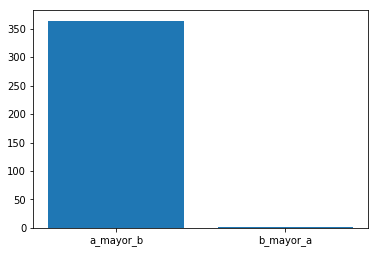

In [44]:
hist = [['a_mayor_b', 'b_mayor_a'],[0, 0]]
estado_inicial = np.array([1, 0])
nuevo_estado_array = estado_inicial
for j in range(365):
    probabilidad_nuevo_estado = np.matmul(nuevo_estado_array, matriz_transiciones)
    u_1 = np.random.uniform(0,1)
    if (u_1 < probabilidad_nuevo_estado[0]):
        nuevo_estado = 1
        hist[1][0] = hist[1][0] + 1
    else:
        nuevo_estado = 0
        hist[1][1] = hist[1][1] + 1
    nuevo_estado_array = np.array([nuevo_estado, 1 if nuevo_estado == 0 else 0])

plt.bar(hist[0], hist[1])

<BarContainer object of 2 artists>

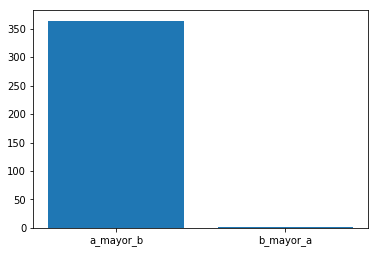

In [45]:
hist = [['a_mayor_b', 'b_mayor_a'],[0, 0]]
estado_inicial = np.array([0, 1])
nuevo_estado_array = estado_inicial
for j in range(365):
    probabilidad_nuevo_estado = np.matmul(nuevo_estado_array, matriz_transiciones)
    u_1 = np.random.uniform(0,1)
    if (u_1 < probabilidad_nuevo_estado[0]):
        nuevo_estado = 1
        hist[1][0] = hist[1][0] + 1
    else:
        nuevo_estado = 0
        hist[1][1] = hist[1][1] + 1
    nuevo_estado_array = np.array([nuevo_estado, 1 if nuevo_estado == 0 else 0])

plt.bar(hist[0], hist[1])

# e) ¿Qué acción recomendaría comprar?

In [133]:
ganador_si_elegimos_A = ""

if (fraccion_tiempo[0][0] > fraccion_tiempo[0][1]):
    ganador_si_elegimos_A = "A"
    print "La accion A tiene mas probabilidad de mantenerse superior a la B que de ser superada"
else:
    ganador_si_elegimos_A = "B"
    print "La accion A tiene mas probabilidad de ser superada por la accion B que de mantenerse superior"

La accion A tiene mas probabilidad de mantenerse superior a la B que de ser superada


In [134]:
ganador_si_elegimos_B = ""

if (fraccion_tiempo[1][0] > fraccion_tiempo[1][1]):
    ganador_si_elegimos_B = "A"
    print "La accion B tiene mas probabilidad de ser superada por la accion A que de mantenerse superior"
else:
    ganador_si_elegimos_B = "B"
    print "La accion B tiene mas probabilidad de mantenerse superior a la A que de ser superada"

La accion B tiene mas probabilidad de ser superada por la accion A que de mantenerse superior


In [135]:
if (ganador_si_elegimos_A == "A" and ganador_si_elegimos_B == "A"):
    print "Conviene elegir A"
elif (ganador_si_elegimos_A == "B" and ganador_si_elegimos_B == "B"):
    print "Conviene elegir B"
else:
    print "Cualquier eleccion es buena"

Conviene elegir A
